In [1]:
!rm -rf
!git clone -b tutorials https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 36544, done.
remote: Counting objects: 100% (1195/1195), done.
remote: Compressing objects: 100% (661/661), done.
remote: Total 36544 (delta 659), reused 889 (delta 520), pack-reused 35349
Receiving objects: 100% (36544/36544), 56.83 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (25594/25594), done.
Updating files: 100% (2037/2037), done.


# 下载数据集

In [31]:
import os
os.chdir('mmdetection')

FileNotFoundError: [Errno 2] No such file or directory: 'mmdetection'

In [34]:
os.getcwd()

'/mnt/openmmlab-Camp/03-mmdetection-task/mmdetection'

In [4]:
!wget https://download.openmmlab.com/mmyolo/data/balloon_dataset.zip

--2023-06-09 03:04:43--  https://download.openmmlab.com/mmyolo/data/balloon_dataset.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 119.96.247.240, 150.139.241.195, 124.236.18.244
Connecting to download.openmmlab.com (download.openmmlab.com)|119.96.247.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38741381 (37M) [application/zip]
Saving to: ‘balloon_dataset.zip’

balloon_dataset.zip 100%[===================>]  36.95M  13.4MB/s    in 2.8s    

2023-06-09 03:04:46 (13.4 MB/s) - ‘balloon_dataset.zip’ saved [38741381/38741381]



In [5]:
!unzip balloon_dataset.zip -d balloon_dataset && rm balloon_dataset.zip 
# 解压并删除压缩包

Archive:  balloon_dataset.zip
   creating: balloon_dataset/balloon/
   creating: balloon_dataset/balloon/train/
  inflating: balloon_dataset/balloon/train/via_region_data.json  
   creating: balloon_dataset/__MACOSX/
   creating: balloon_dataset/__MACOSX/balloon/
   creating: balloon_dataset/__MACOSX/balloon/train/
  inflating: balloon_dataset/__MACOSX/balloon/train/._via_region_data.json  
  inflating: balloon_dataset/balloon/train/53500107_d24b11b3c2_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._53500107_d24b11b3c2_b.jpg  
  inflating: balloon_dataset/balloon/train/120853323_d4788431b9_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._120853323_d4788431b9_b.jpg  
  inflating: balloon_dataset/balloon/train/126700562_8e27720147_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._126700562_8e27720147_b.jpg  
  inflating: balloon_dataset/balloon/train/145053828_e0e748717c_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._145053828_e0e7487

# 可视化数据集

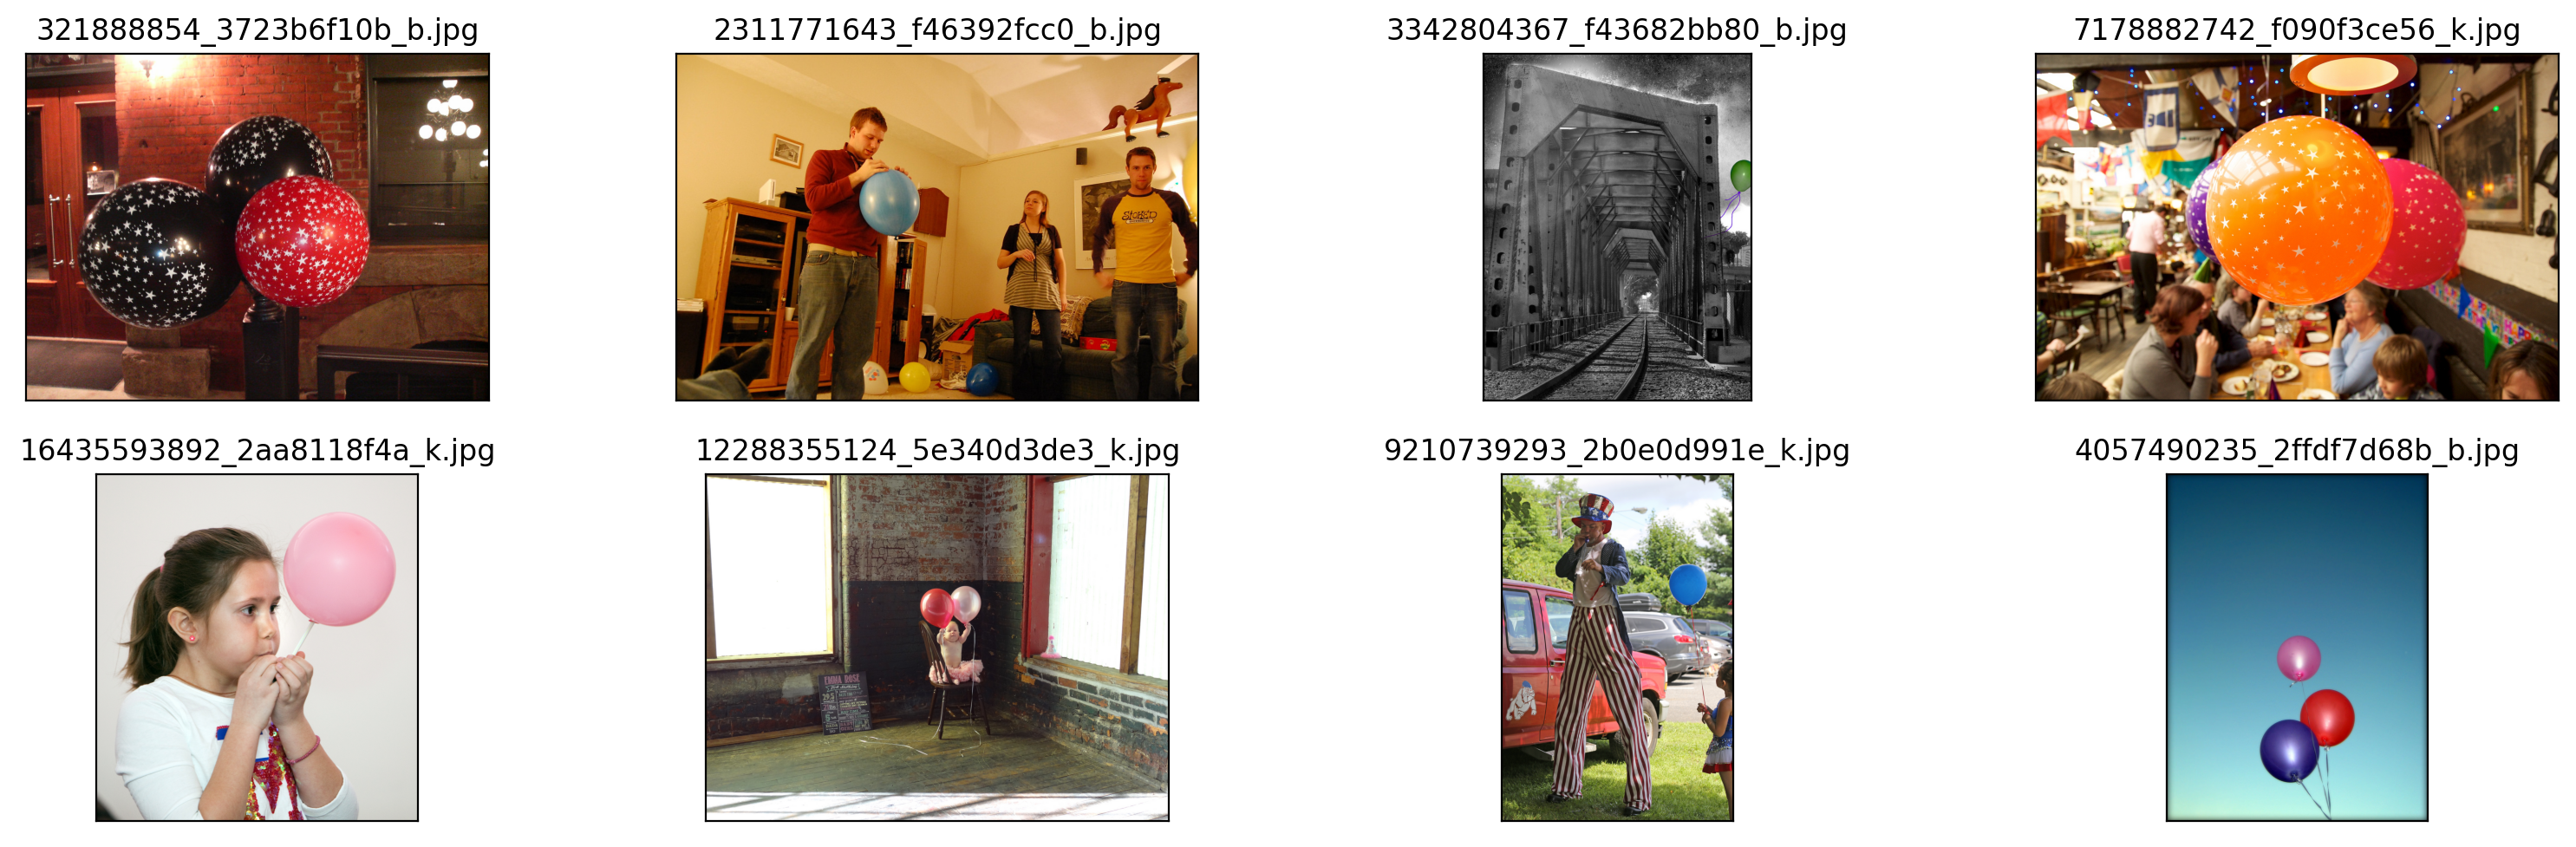

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

img_path='balloon_dataset/balloon/train/'
image_paths= [filename for filename in os.listdir(img_path)][:8]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open(img_path+filename).convert("RGB")
  
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

# 可视化标签(手动读取原始json)

/tmp/ipykernel_758/3802134151.py:40: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(points, True)


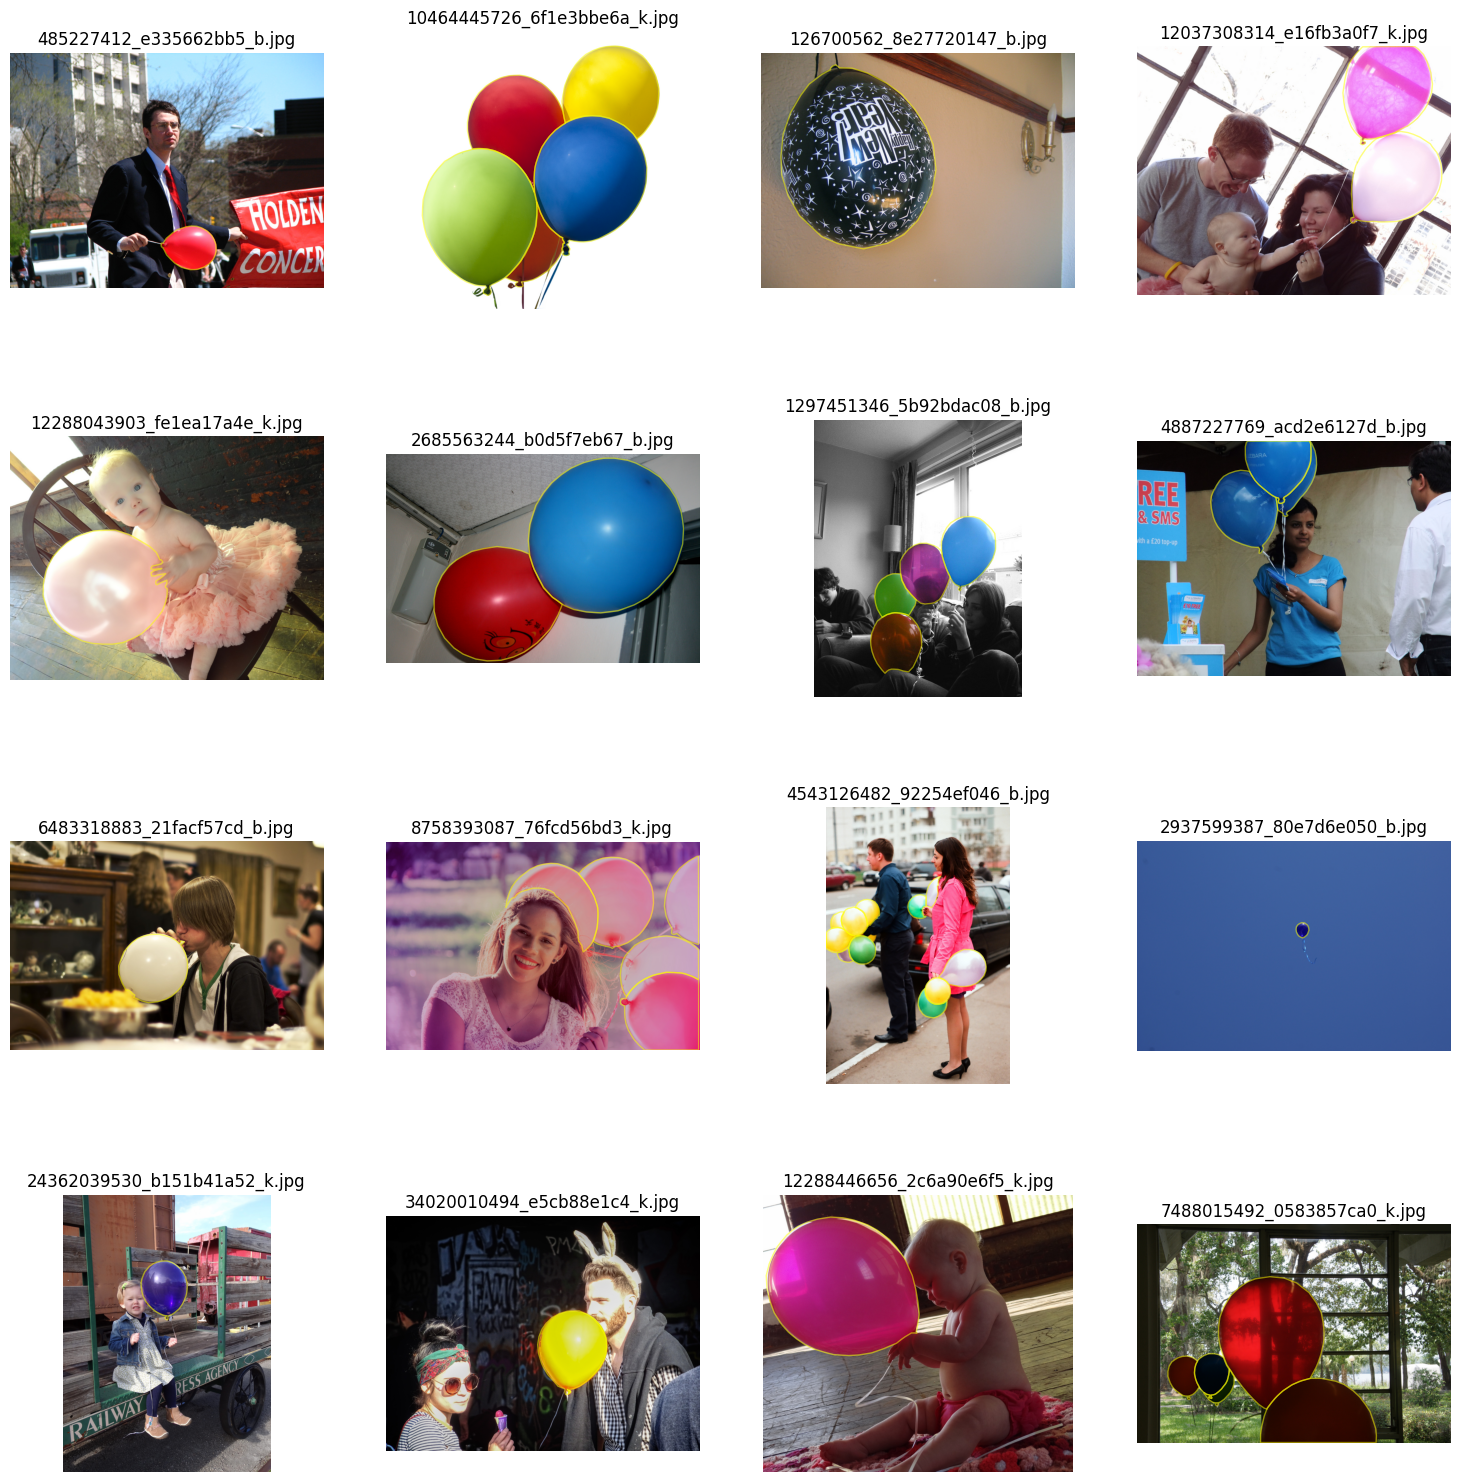

In [30]:
import json
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import random

# 读取JSON文件
with open('balloon_dataset/balloon/train/via_region_data.json') as f:
    annotations = json.load(f)

# 获取所有图像的ID
image_ids = list(annotations.keys())

# 随机选择16个图像ID
random_image_ids = random.sample(image_ids, 16)

# 创建一个4x4的子图
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# 遍历每个图像ID
for i, image_id in enumerate(random_image_ids):
    # 获取图像的文件名和大小
    filename = annotations[image_id]['filename']
    size = annotations[image_id]['size']
    
    # 读取图像文件
    image = Image.open(f'balloon_dataset/balloon/train/{filename}')
    
    # 获取多边形注释信息
    regions = annotations[image_id]['regions']
    patches = []
    for region_id, region_info in regions.items():
        # 获取多边形顶点坐标
        x = region_info['shape_attributes']['all_points_x']
        y = region_info['shape_attributes']['all_points_y']
        points = list(zip(x, y))
        
        # 创建多边形对象
        polygon = Polygon(points, True)
        patches.append(polygon)
    
    # 计算子图的行和列索引
    row = i // 4
    col = i % 4
    
    # 在子图中显示图像和注释
    axs[row, col].imshow(image)
    axs[row, col].set_title(filename)
    p = PatchCollection(patches, alpha=0.5, facecolor='none', edgecolor='yellow')
    axs[row, col].add_collection(p)

# 调整子图的间距和轴的可见性
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.4)
for ax in axs.flat:
    ax.axis('off')

# 显示子图
plt.show()

# 可视化标签（处理过的json-json2coco.ipynb）

loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


/tmp/ipykernel_758/223859540.py:23: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  2: Image.FLIP_LEFT_RIGHT,
/tmp/ipykernel_758/223859540.py:24: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  3: Image.ROTATE_180,
/tmp/ipykernel_758/223859540.py:25: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  4: Image.FLIP_TOP_BOTTOM,
/tmp/ipykernel_758/223859540.py:26: DeprecationWarning: TRANSPOSE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.TRANSPOSE instead.
  5: Image.TRANSPOSE,
/tmp/ipykernel_758/223859540.py:27: DeprecationWarning: ROTATE_270 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_270 instead.
  6: Image.ROTATE_270,
/tmp/ipykernel_758/223859540.py:28: DeprecationW

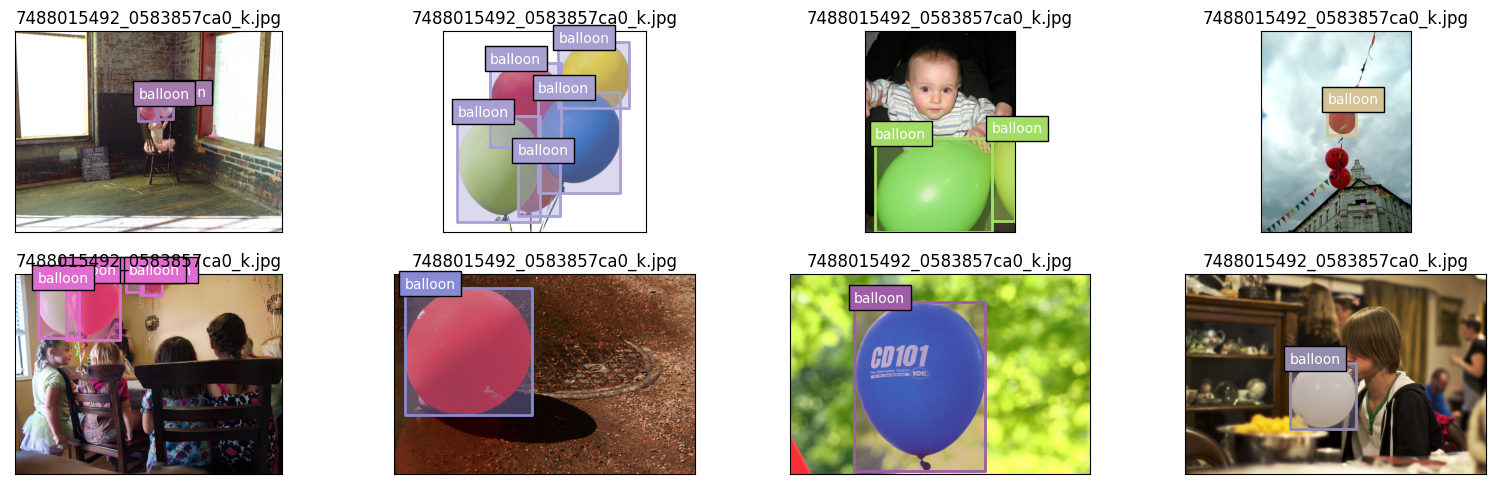

In [33]:
from pycocotools.coco import COCO
import numpy as np
import os.path as osp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def apply_exif_orientation(image):
    _EXIF_ORIENT = 274
    if not hasattr(image, 'getexif'):
        return image

    try:
        exif = image.getexif()
    except Exception:
        exif = None

    if exif is None:
        return image

    orientation = exif.get(_EXIF_ORIENT)

    method = {
        2: Image.FLIP_LEFT_RIGHT,
        3: Image.ROTATE_180,
        4: Image.FLIP_TOP_BOTTOM,
        5: Image.TRANSPOSE,
        6: Image.ROTATE_270,
        7: Image.TRANSVERSE,
        8: Image.ROTATE_90,
    }.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image


def show_bbox_only(coco, anns, show_label_bbox=True, is_filling=True):
    """Show bounding box of annotations Only."""
    if len(anns) == 0:
        return

    ax = plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat] = (np.random.random((1, 3)) * 0.7 + 0.3).tolist()[0]

    polygons = []
    colors = []

    for ann in anns:
        color = image2color[ann['category_id']]
        bbox_x, bbox_y, bbox_w, bbox_h = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y + bbox_h],
                [bbox_x + bbox_w, bbox_y + bbox_h], [bbox_x + bbox_w, bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4, 2))))
        colors.append(color)

        if show_label_bbox:
            label_bbox = dict(facecolor=color)
        else:
            label_bbox = None

        ax.text(
            bbox_x,
            bbox_y,
            '%s' % (coco.loadCats(ann['category_id'])[0]['name']),
            color='white',
            bbox=label_bbox)

    if is_filling:
        p = PatchCollection(
            polygons, facecolor=colors, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    p = PatchCollection(
        polygons, facecolor='none', edgecolors=colors, linewidths=2)
    ax.add_collection(p)

    
coco = COCO('balloon_dataset/balloon/train/balloon_train.json')
image_ids = coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16, 5))

# 只可视化 8 张图片
for i in range(8):
    image_data = coco.loadImgs(image_ids[i])[0]
    image_path = osp.join('balloon_dataset/balloon/train',image_data['file_name'])
    annotation_ids = coco.getAnnIds(
            imgIds=image_data['id'], catIds=[], iscrowd=0)
    annotations = coco.loadAnns(annotation_ids)
    
    ax = plt.subplot(2, 4, i+1)
    image = Image.open(image_path).convert("RGB")
    
    # 这行代码很关键，否则可能图片和标签对不上
    image=apply_exif_orientation(image)
    
    ax.imshow(image)
    
    show_bbox_only(coco, annotations)
    
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])
        
plt.tight_layout()    